<a href="https://colab.research.google.com/github/kareemullah123456789/NLP/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install numpy matplotlib scikit-learn gensim torch transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

ModuleNotFoundError: No module named 'numpy.rec'

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# One-hot encoding example
vocabulary = ["king", "queen", "man", "woman", "royal"]
vocab_size = len(vocabulary)

# Create one-hot vectors
one_hot_vectors = {}
for i, word in enumerate(vocabulary):
    vector = np.zeros(vocab_size)
    vector[i] = 1
    one_hot_vectors[word] = vector

print("One-hot representation of 'king':", one_hot_vectors["king"])
print("One-hot representation of 'queen':", one_hot_vectors["queen"])

# Calculate similarity between king and queen (one-hot)
similarity_onehot = cosine_similarity([one_hot_vectors["king"]], [one_hot_vectors["queen"]])[0][0]
print(f"Cosine similarity between 'king' and 'queen' (one-hot): {similarity_onehot}")

One-hot representation of 'king': [1. 0. 0. 0. 0.]
One-hot representation of 'queen': [0. 1. 0. 0. 0.]
Cosine similarity between 'king' and 'queen' (one-hot): 0.0


Word2Vec

Word2Vec introduces two architectures: Skip-gram and CBOW (Continuous Bag of Words).
Skip-gram Implementation

Epoch 0, Loss: 227.2143
Epoch 20, Loss: 186.9714
Epoch 40, Loss: 178.6823
Epoch 60, Loss: 173.9223
Epoch 80, Loss: 171.3633
Embedding shape: (11, 10)


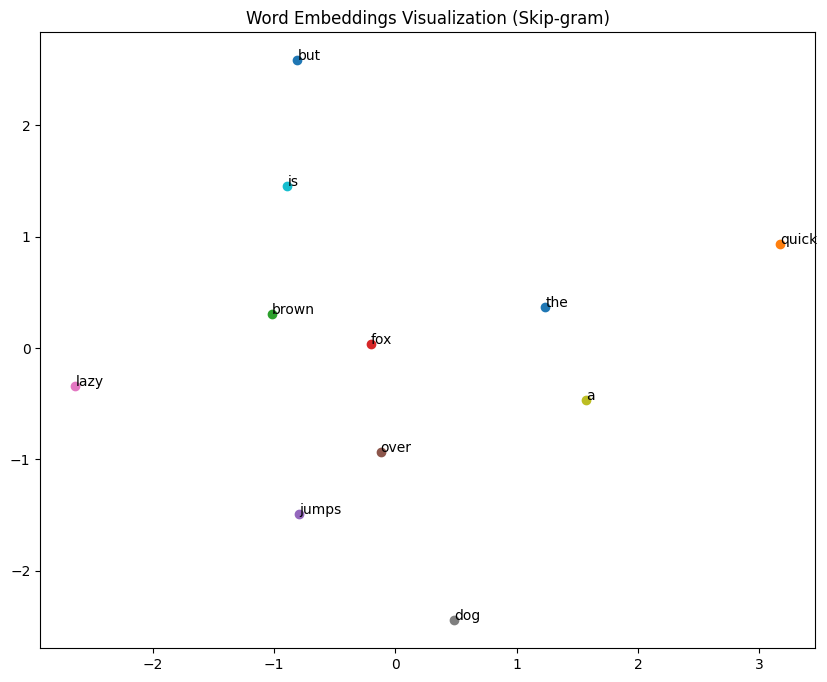

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, Counter
import random

class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.output = nn.Linear(embedding_dim, vocab_size)

    def forward(self, center_word):
        embedded = self.embedding(center_word)
        output = self.output(embedded)
        return output

# Simple corpus
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "a quick brown dog jumps over the lazy fox",
    "the dog is lazy but the fox is quick"
]

# Preprocessing
def preprocess_corpus(corpus):
    all_words = []
    for sentence in corpus:
        words = sentence.lower().split()
        all_words.extend(words)

    word_counts = Counter(all_words)
    vocab = [word for word, count in word_counts.items() if count >= 1]

    word_to_idx = {word: i for i, word in enumerate(vocab)}
    idx_to_word = {i: word for word, i in word_to_idx.items()}

    return vocab, word_to_idx, idx_to_word

vocab, word_to_idx, idx_to_word = preprocess_corpus(corpus)
vocab_size = len(vocab)

# Generate training data (center word, context word pairs)
def generate_training_data(corpus, word_to_idx, window_size=2):
    training_data = []
    for sentence in corpus:
        words = sentence.lower().split()
        for i, center_word in enumerate(words):
            for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
                if i != j:
                    context_word = words[j]
                    training_data.append((word_to_idx[center_word], word_to_idx[context_word]))
    return training_data

training_data = generate_training_data(corpus, word_to_idx)

# Training
embedding_dim = 10
model = SkipGramModel(vocab_size, embedding_dim)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Simple training loop
for epoch in range(100):
    total_loss = 0
    for center_idx, context_idx in training_data:
        center_tensor = torch.tensor([center_idx])
        context_tensor = torch.tensor([context_idx])

        optimizer.zero_grad()
        output = model(center_tensor)
        loss = criterion(output, context_tensor)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Extract embeddings
embeddings = model.embedding.weight.detach().numpy()
print(f"Embedding shape: {embeddings.shape}")

# Visualize embeddings
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for i, word in enumerate(vocab):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("Word Embeddings Visualization (Skip-gram)")
plt.show()

In [3]:
#Using Pre-trained Word2Vec

In [4]:
# Using Gensim's Word2Vec
from gensim.models import Word2Vec

# Prepare data for Gensim
sentences = [sentence.lower().split() for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4, sg=1)

# Get word vectors
print("Vector for 'fox':", model.wv['fox'])
print("Vector for 'dog':", model.wv['dog'])

# Find similar words
similar_words = model.wv.most_similar('fox', topn=3)
print("Words similar to 'fox':", similar_words)

# Word analogy
try:
    result = model.wv.most_similar(positive=['quick', 'dog'], negative=['fox'], topn=1)
    print("Analogy result:", result)
except:
    print("Not enough data for analogy")

Vector for 'fox': [ 1.56351421e-02 -1.90203730e-02 -4.11062239e-04  6.93839323e-03
 -1.87794445e-03  1.67635437e-02  1.80215668e-02  1.30730132e-02
 -1.42324204e-03  1.54208085e-02 -1.70686692e-02  6.41421322e-03
 -9.27599426e-03 -1.01779103e-02  7.17923651e-03  1.07406788e-02
  1.55390287e-02 -1.15330126e-02  1.48667218e-02  1.32509926e-02
 -7.41960062e-03 -1.74912829e-02  1.08749345e-02  1.30195115e-02
 -1.57510047e-03 -1.34197120e-02 -1.41718509e-02 -4.99412045e-03
  1.02865072e-02 -7.33047491e-03 -1.87401194e-02  7.65347946e-03
  9.76895820e-03 -1.28571270e-02  2.41711619e-03 -4.14975407e-03
  4.88066689e-05 -1.97670180e-02  5.38400887e-03 -9.50021297e-03
  2.17529293e-03 -3.15244915e-03  4.39334614e-03 -1.57631524e-02
 -5.43436781e-03  5.32639725e-03  1.06933638e-02 -4.78302967e-03
 -1.90201886e-02  9.01175756e-03]
Vector for 'dog': [-0.01632345  0.00899397 -0.00827509  0.00165078  0.01700266 -0.00892454
  0.00903611 -0.01356997 -0.00710033  0.01879749 -0.00315854  0.00064092
 -0.

In [5]:
#GloVe combines global matrix factorization with local context window methods.

In [6]:
# Using pre-trained GloVe embeddings
import urllib.request
import zipfile
import os

def download_glove():
    url = "https://nlp.stanford.edu/data/glove.6B.zip"
    if not os.path.exists("glove.6B.50d.txt"):
        print("Downloading GloVe embeddings...")
        urllib.request.urlretrieve(url, "glove.6B.zip")
        with zipfile.ZipFile("glove.6B.zip", 'r') as zip_ref:
            zip_ref.extractall(".")
        os.remove("glove.6B.zip")

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Uncomment to download and use GloVe
# download_glove()
# glove_embeddings = load_glove_embeddings("glove.6B.50d.txt")

# Example usage (mock data for demonstration)
# Mock GloVe embeddings for demonstration
glove_embeddings = {
    'king': np.random.randn(50),
    'queen': np.random.randn(50),
    'man': np.random.randn(50),
    'woman': np.random.randn(50)
}

# Calculate similarity
def cosine_similarity_manual(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

if 'king' in glove_embeddings and 'queen' in glove_embeddings:
    similarity = cosine_similarity_manual(glove_embeddings['king'], glove_embeddings['queen'])
    print(f"Cosine similarity between 'king' and 'queen': {similarity:.4f}")

Cosine similarity between 'king' and 'queen': -0.0694


In [7]:
#FASttext

from gensim.models import FastText

# Train FastText model
sentences = [sentence.lower().split() for sentence in corpus]
fasttext_model = FastText(sentences, vector_size=50, window=2, min_count=1, workers=4, sg=1)

# Get word vector
print("FastText vector for 'fox':", fasttext_model.wv['fox'])

# Handle out-of-vocabulary words
oov_word = "foxes"  # This might not be in our small corpus
try:
    vector = fasttext_model.wv[oov_word]
    print(f"FastText can handle OOV word '{oov_word}': {vector[:5]}...")
except KeyError:
    print(f"Word '{oov_word}' not found")

# FastText can generate embeddings for words not in training data
print("FastText similarity with 'fox':", fasttext_model.wv.most_similar('fox', topn=2))

FastText vector for 'fox': [ 5.0645573e-03 -4.9674534e-03 -4.8964769e-03 -1.4342732e-03
 -2.0659089e-03  3.9471784e-03  6.2998929e-03 -5.3577232e-03
  4.0369108e-04 -1.4731979e-04 -5.9642354e-03  9.8091736e-03
  4.8335781e-03 -8.5309369e-04 -3.2700731e-03 -6.2401072e-05
  1.1079471e-02 -3.4909882e-03  1.8647090e-03  2.5754974e-03
 -5.4205512e-03  3.7895155e-03  4.0380587e-03  4.7676871e-03
 -6.7767650e-03  3.2409099e-03  3.3658308e-03 -2.9784464e-03
 -7.7596959e-04 -3.4682397e-03 -4.2414971e-04  7.7550480e-04
  3.7133975e-03 -5.8517128e-04  8.5033607e-03 -4.9000387e-03
 -8.1664789e-03 -5.7480559e-03  2.2548549e-03 -9.5656404e-04
 -6.1972328e-03  2.2826234e-03  9.1379108e-03  4.2679668e-03
  4.5076907e-03 -5.4636854e-03  5.6646140e-03 -3.1058197e-03
 -7.8610051e-03 -2.4508077e-03]
FastText can handle OOV word 'foxes': [-0.00079111 -0.0021183  -0.00437409 -0.0058491  -0.00103264]...
FastText similarity with 'fox': [('quick', 0.4100300371646881), ('jumps', 0.13149534165859222)]


In [8]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize and encode
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    # Use the [CLS] token embedding or mean pooling
    # Here we use mean pooling
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Example usage
sentence1 = "The bank is near the river"
sentence2 = "I need to go to the bank to withdraw money"

embed1 = get_bert_embedding(sentence1)
embed2 = get_bert_embedding(sentence2)

print(f"Sentence 1 embedding shape: {embed1.shape}")
print(f"Sentence 2 embedding shape: {embed2.shape}")

# Calculate similarity
similarity = torch.cosine_similarity(embed1, embed2)
print(f"Contextual similarity: {similarity.item():.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Sentence 1 embedding shape: torch.Size([1, 768])
Sentence 2 embedding shape: torch.Size([1, 768])
Contextual similarity: 0.5831


In [9]:
# Word similarity evaluation
def evaluate_word_similarity(embeddings, word_pairs_with_scores):
    """
    Evaluate embeddings on word similarity tasks
    word_pairs_with_scores: list of (word1, word2, human_score)
    """
    predictions = []
    human_scores = []

    for word1, word2, score in word_pairs_with_scores:
        if word1 in embeddings and word2 in embeddings:
            sim = cosine_similarity_manual(embeddings[word1], embeddings[word2])
            predictions.append(sim)
            human_scores.append(score)

    # Calculate Spearman correlation
    from scipy.stats import spearmanr
    correlation, p_value = spearmanr(predictions, human_scores)
    return correlation, p_value

# Example word pairs (mock data)
word_pairs = [
    ("king", "queen", 0.8),
    ("man", "woman", 0.7),
    ("car", "automobile", 0.9),
    ("dog", "cat", 0.6)
]

# Evaluate (using mock embeddings)
mock_embeddings = {word: np.random.randn(50) for word in ["king", "queen", "man", "woman", "car", "automobile", "dog", "cat"]}
correlation, p_value = evaluate_word_similarity(mock_embeddings, word_pairs)
print(f"Word similarity correlation: {correlation:.4f} (p-value: {p_value:.4f})")

Word similarity correlation: 0.4000 (p-value: 0.6000)


In [10]:
def evaluate_analogies(embeddings, analogies):
    """
    Evaluate on analogy tasks: a is to b as c is to d
    analogies: list of (a, b, c, d) tuples
    """
    correct = 0
    total = 0

    for a, b, c, d in analogies:
        if all(word in embeddings for word in [a, b, c, d]):
            # Calculate: b - a + c ≈ d
            predicted_vector = embeddings[b] - embeddings[a] + embeddings[c]

            # Find the closest word to predicted_vector
            best_word = None
            best_similarity = -1

            for word, vector in embeddings.items():
                if word not in [a, b, c]:  # Exclude input words
                    sim = cosine_similarity_manual(predicted_vector, vector)
                    if sim > best_similarity:
                        best_similarity = sim
                        best_word = word

            if best_word == d:
                correct += 1
            total += 1

    accuracy = correct / total if total > 0 else 0
    return accuracy

# Example analogies
analogies = [
    ("king", "queen", "man", "woman"),
    ("paris", "france", "london", "england")
]

# Mock evaluation
mock_embeddings = {
    "king": np.array([1, 0, 0, 0, 0]),
    "queen": np.array([0.8, 0.2, 0, 0, 0]),
    "man": np.array([0.6, 0, 0.4, 0, 0]),
    "woman": np.array([0.4, 0.2, 0.4, 0, 0])
}

accuracy = evaluate_analogies(mock_embeddings, [("king", "queen", "man", "woman")])
print(f"Analogy accuracy: {accuracy:.4f}")

Analogy accuracy: 1.0000
